## Dataset
[**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class. 

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 51s 0us/step


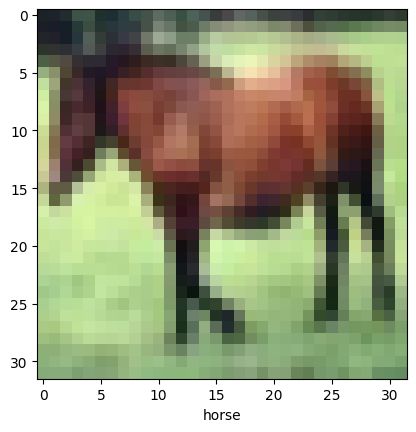

In [13]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture
- It is a stack of Convolutional layers **(Conv2D)** and MaxPooling layers **(MaxPooling2D).**
- The Convolutional layers extract features from the input image.
- The MaxPooling layers downsample the features to reduce their size.

We will start by building the Convolutional Base.

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1:**

- Input shape: 32x32x3 (meaning the input image has a width and height of 32 pixels, and it has 3 color channels - RGB).
- We apply 32 filters of size 3x3 over the input data.
- The activation function relu is applied to the output of each convolution operation.

**Layer 2:**

- This layer performs the max pooling operation using 2x2 samples and a stride of 2.
- Max pooling reduces the size of the feature map by taking the maximum value in each 2x2 region.

**Other Layers:**

- The next layers perform similar operations, but they take the feature map from the previous layer as input.
- They increase the number of filters from 32 to 64. This helps capture more complex features.
- As the data passes through the layers, its spatial dimensions decrease, allowing us to add more depth (filters) computationally.

In [15]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

## Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.



In [16]:
model.add(layers.Flatten()) # input layer
model.add(layers.Dense(64, activation='relu')) # hidden layer
model.add(layers.Dense(10)) # output layer

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).

## Training
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

*Note: This will take much longer than previous models!*

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 66s 40ms/step - loss: 1.5487 - accuracy: 0.4331 - val_loss: 1.2714 - val_accuracy: 0.5473
Epoch 2/2
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1865 - accuracy: 0.5797 - val_loss: 1.1087 - val_accuracy: 0.6079


## Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 1.1087 - accuracy: 0.6079 - 4s/epoch - 14ms/step
0.6079000234603882


I should be getting an accuracy of about 70% but I got 60% cuz I've taken epochs of 2 so that It will take less time.
If I taken epochs of 10 it should Definitely give an accuracy of 70%.
This isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision.

## Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images. 

### Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes. 

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.

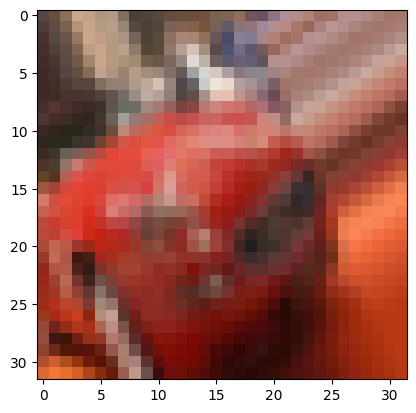

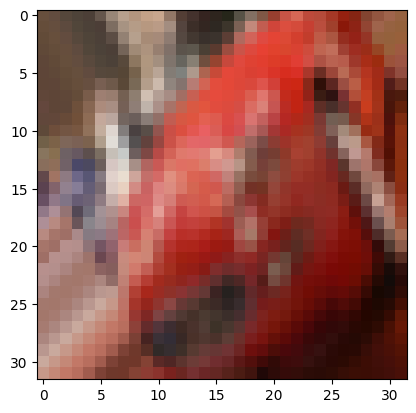

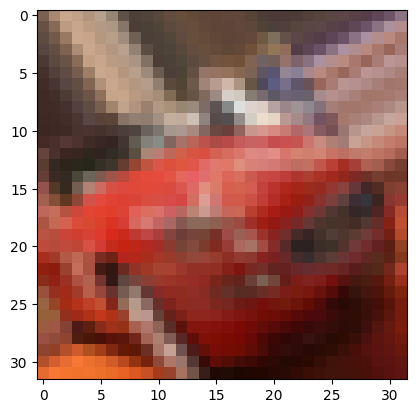

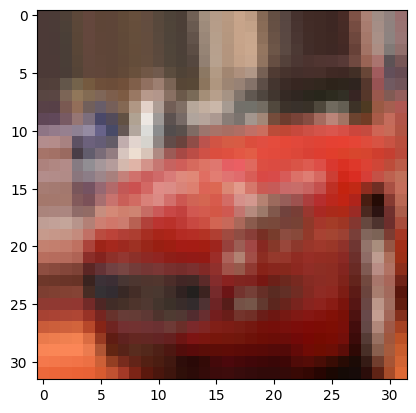

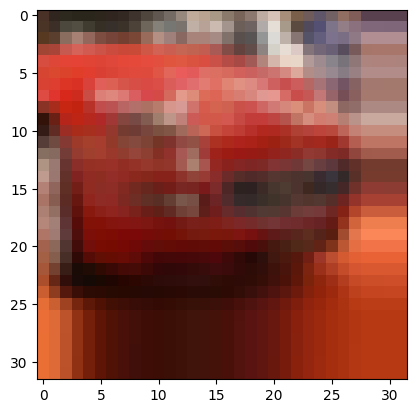

In [28]:
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[5]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()
